In [1]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
from IPython.display import Image  
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
N = 1000
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
xkm, y = make_blobs(n_samples=N, n_features=2, centers=4, cluster_std=1,
center_box=(-10.0, 10.0), shuffle=True, random_state=1)


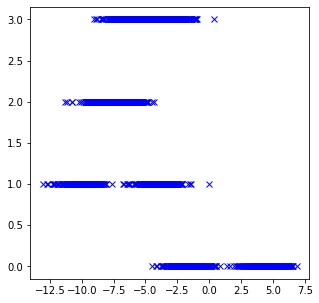

In [3]:
fig = plt.figure(figsize=(5,5))
plt.plot(xkm, y, 'bx')
plt.show()

# Método do cotovelo

In [4]:
def calculate_wcss(data):
        wcss = []
        for n in range(2, 21):
            kmeans = KMeans(n_clusters=n)
            kmeans.fit(X=data)
            wcss.append(kmeans.inertia_)
    
        return wcss

In [5]:
def optimal_number_of_clusters(wcss):
    from math import sqrt
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]

        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    return distances.index(max(distances)) + 2

In [7]:
wcss_y = calculate_wcss(xkm)
n = optimal_number_of_clusters(wcss_y)

In [8]:
kmeans = KMeans(n_clusters=n)
clusters = kmeans.fit_predict(xkm)

In [9]:
x1, x2 = 2, 20
intervalo = range(x1,x2+1)

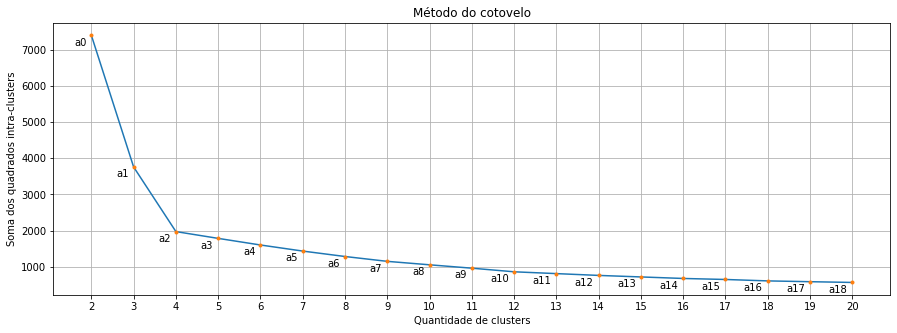

In [10]:
plt.figure(figsize=(15,5))
plt.title('Método do cotovelo')
plt.xlabel('Quantidade de clusters')
plt.ylabel('Soma dos quadrados intra-clusters')
plt.grid()
plt.xticks(intervalo)
plt.plot(intervalo, wcss_y) # pontos laranjas
plt.plot(intervalo, wcss_y, '.') # linha azul
for x,y in zip(intervalo,wcss_y): # colocando nome nos pontos
    label = "a{}".format(x-2)
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(-5,-10),
                 ha='right')
plt.show()

# Método do cotovelo para k=4 (do gráfico)

In [11]:
km = KMeans(n_clusters=4, init='k-means++')
y_km = km.fit_predict(xkm)

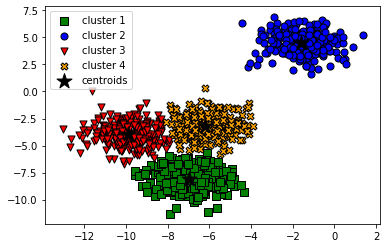

In [12]:
plt.scatter(xkm[y_km == 0, 0], xkm[y_km == 0, 1], s=50, c='green', marker='s', edgecolor='black', label='cluster 1')
plt.scatter(xkm[y_km == 1, 0], xkm[y_km == 1, 1], s=50, c='blue', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(xkm[y_km == 2, 0], xkm[y_km == 2, 1], s=50, c='red', marker='v', edgecolor='black', label='cluster 3')
plt.scatter(xkm[y_km == 3, 0], xkm[y_km == 3, 1], s=50, c='orange', marker='X', edgecolor='black', label='cluster 4')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='black', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)

# Método da silhueta

In [13]:
sil = []
kmax = 20

In [14]:
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(xkm)
  labels = kmeans.labels_
  sil.append(silhouette_score(xkm, labels, metric = 'euclidean'))

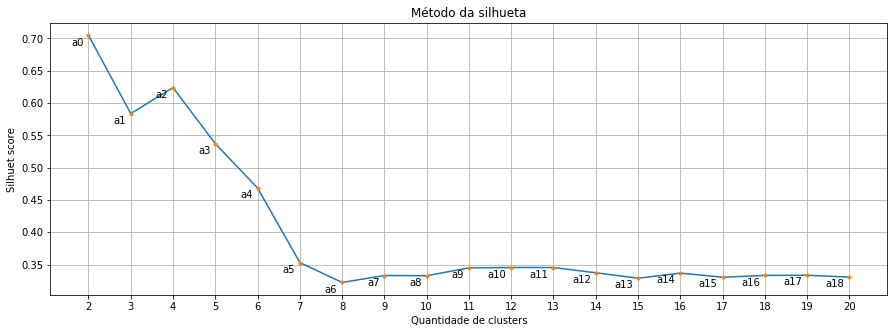

In [15]:
plt.figure(figsize=(15,5))
plt.title('Método da silhueta')
plt.xlabel('Quantidade de clusters')
plt.ylabel('Silhuet score')
plt.grid()
plt.xticks(intervalo)
plt.plot(intervalo, sil) # pontos laranjas
plt.plot(intervalo,sil, '.') # linha azul
for x,y in zip(intervalo,sil): # colocando nome nos pontos
    label = "a{}".format(x-2)
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(-5,-10),
                 ha='right')
plt.show()

# Método da silhueta para k=2

In [16]:
km = KMeans(n_clusters=2, init='k-means++')
y_km = km.fit_predict(xkm)

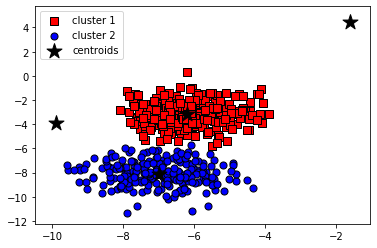

In [20]:
plt.scatter(xkm[y_km == 0, 0], xkm[y_km == 0, 1], s=50, c='red', marker='s', edgecolor='black', label='cluster 1')
plt.scatter(xkm[y_km == 1, 0], xkm[y_km == 1, 1], s=50, c='blue', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='black', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)

# Método da silhueta para k=4

In [21]:
km = KMeans(n_clusters=4, init='k-means++')
y_km = km.fit_predict(xkm)

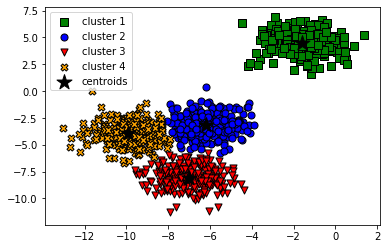

In [22]:
plt.scatter(xkm[y_km == 0, 0], xkm[y_km == 0, 1], s=50, c='green', marker='s', edgecolor='black', label='cluster 1')
plt.scatter(xkm[y_km == 1, 0], xkm[y_km == 1, 1], s=50, c='blue', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(xkm[y_km == 2, 0], xkm[y_km == 2, 1], s=50, c='red', marker='v', edgecolor='black', label='cluster 3')
plt.scatter(xkm[y_km == 3, 0], xkm[y_km == 3, 1], s=50, c='orange', marker='X', edgecolor='black', label='cluster 4')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='black', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)